<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [2]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `C:\Users\slee4\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\slee4\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\slee4\.julia\environments\v1.8\Manifest.toml`


In [3]:
import SpecialFunctions
import Plots

In [4]:
using SpecialFunctions
function sample_gaussian(μ, σ, n)
    gaussRegular = zeros(n)
    gaussTransformed = zeros(n)
    
    for i in 1:n
        uniform = rand()
        gaussRegular[i] = sqrt(2) .* SpecialFunctions.erfinv(1 .- (2 .* uniform)) #produce gaussian data with μ = 0, σ = 1
        
    end
    gaussTransformed = (gaussRegular .* σ) .+ μ  #transform gaussian data to have desired μ and σ
end


sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

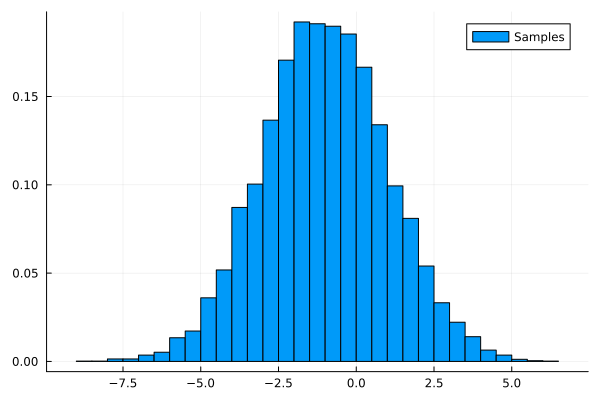

In [5]:
using Plots
μ = -1
σ = 2
data = sample_gaussian(μ, σ, 10000)
histogram(data, label = "Samples", normalize = true)

In [6]:
import Pkg
Pkg.add(["Distributions", "Random"])
import Distributions as di
using Random

   Resolving package versions...
  No Changes to `C:\Users\slee4\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\slee4\.julia\environments\v1.8\Manifest.toml`


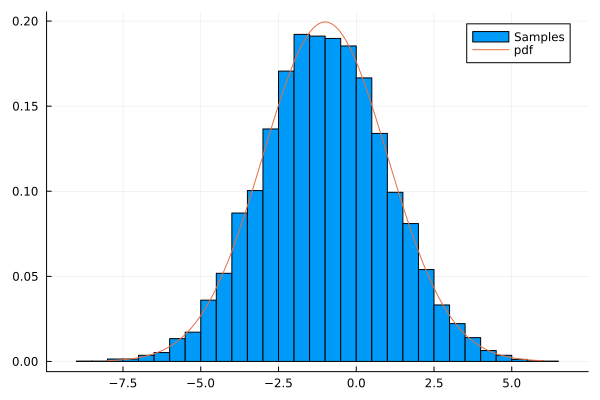

In [7]:
using Distributions: pdf
x = -8:0.001:6
n = di.Normal(μ, σ)
d = rand(n, length(x))
pdf_plot = di.pdf.(n, x)
plot!(x, pdf_plot, label = "pdf")